In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import math

%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">


## Hello 
# Scientific Programming Lab

- Teil 1: Riemann Ingergrale mit Ober- und Untersummen, Trapezregel
  - Methode der numerischen Intergration
    - Obersumme, Untersumme, Trapezregel
  - Bsp. an Notebook 7
      - Achten auf Definitionslücken und Nulldurchgänge
- Teil 2: Intergration mittels Monte-Carlo-Simulation
  - Grundlagen der Intergration
  - Manuelle Wahl des Sampling-Bereichs
    - explorative Methode

- Teil 3: Darstellung der Intergrationsmethode
  - Ergebnisse visualisieren:
    - Teil 1
    - Teil 2
  - Schnittstelle bzw. Integration

- Teil 4: Test der numerischen Intergration
  - Verschiedene Klassen von Funktionen
    - $\sin(x)$ mit Intervall $[-3, 3]$  
    - $e^x$ mit Intervall $[0, 10]$
  - Annäherung eines tatsächlichen Wertes
  - Stammfunktion bilden

- Teil 5: Grenzen numerischer Intergration
  - Funktion $\sin\left(\left(x + \frac{1}{32}\right) \cdot 16\pi \right)$
  - Aufteilung auf 2, 4, 8 und 16 gleichgroße Intervalle
  - Optional:
    - Gaußsche Fehlerfunktion
      - Klassisch nicht intergrierbar
      - Numerisch intergrierbar


      

$$
\displaystyle
\left( \sum_{k=1}^n a_k b_k \right)^2
\leq
\left( \sum_{k=1}^n a_k^2 \right)
\left( \sum_{k=1}^n b_k^2 \right)
$$

# 🧩 Teil 1: Riemann-Integration – Ober-/Untersummen und Trapezregel

## 🎯 Ziel
Approximation bestimmter Integrale mithilfe klassischer Verfahren: Untersumme, Obersumme und Trapezregel.

## 📐 Mathematischer Hintergrund

Gegeben ist eine Funktion \( f(x) \) auf dem Intervall \([a, b]\), das in \(n\) gleich große Intervalle der Breite \(\Delta x = \frac{b - a}{n}\) aufgeteilt wird.

### 🔹 Untersumme
\[
U_n = \sum_{i=0}^{n-1} \min(f(x_i), f(x_{i+1})) \cdot \Delta x
\]

### 🔹 Obersumme
\[
O_n = \sum_{i=0}^{n-1} \max(f(x_i), f(x_{i+1})) \cdot \Delta x
\]

### 🔹 Trapezregel
\[
T_n = \frac{\Delta x}{2} \left( f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
\]

## 🧰 Besonderheiten bei der Implementierung
- Unterstützung für beliebige Funktionen \( f(x) \)
- Behandlung von Definitionslücken und Nullstellen
- Flexibel wählbare Anzahl der Intervalle \( n \)
- Auswahl der Methode über Argumente: `'lower'`, `'upper'`, `'trapezoid'`


In [ ]:
import unittest

class Riemann_Intergration:
    def berechne(self, f, a, b, n):
        x = np.linspace(a, b, n+1)
        dx = (b - a) / n
        y = f(x)

        lower_sum = sum(min(f(x[i]), f(x[i+1])) for i in range(n)) * dx
        upper_sum = sum(max(f(x[i]), f(x[i+1])) for i in range(n)) * dx
        trapez = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))

        print("🔹 Teil 1 – Riemann & Trapezregel:")
        print(f"  Untersumme: {lower_sum:.6f}")
        print(f"  Obersumme:  {upper_sum:.6f}")
        print(f"  Trapezregel: {trapez:.6f}")

        
riemann = Riemann_Intergration()
riemann.berechne(sin(x), a, b, 10)


🔹 Teil 1 – Riemann & Trapezregel:
  Untersumme: 0.450000
  Obersumme:  0.550000
  Trapezregel: 0.500000


# 🎲 Teil 2: Integration mittels Monte-Carlo-Simulation

## 🎯 Ziel
Numerische Integration über zufällige Stichproben anstatt regelmäßiger Unterteilungen.

## 📐 Mathematisches Prinzip

Bei der Monte-Carlo-Integration werden \( N \) zufällige Punkte \( x_i \in [a, b] \) erzeugt:

\[
\int_a^b f(x) \, dx \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i)
\]

## 🧰 Merkmale der Implementierung
- Unterstützung für manuelle oder automatische Intervallbestimmung
- Reproduzierbarkeit durch Zufallssaat (optional)
- Anpassbare Stichprobenzahl \( N \)
- Gut geeignet für unregelmäßige oder hochdimensionale Funktionen


In [ ]:
class MonteCarloIntegration:
    def __init__(self):
        np.random.seed(0)  # Für reproduzierbare Ergebnisse

    def berechne(self, f, a, b, N):
        samples = np.random.uniform(a, b, N)
        mc_result = (b - a) * np.mean(f(samples))

        print("🔹 Teil 2 – Monte-Carlo:")
        print(f"  Monte-Carlo Approximation (N={N}): {mc_result:.6f}")

montecarlo = MonteCarloIntegration()
monte.berechne()

# 📈 Teil 3: Darstellung der Integrationsmethoden

## 🎯 Ziel
Visuelle Darstellung von Funktionen, Flächen und Approximationsmethoden.

## 📐 Was wird dargestellt?
- Der Funktionsgraph \( f(x) \) auf dem Intervall \([a, b]\)
- Fläche unter der Kurve durch `fill_between`
- (Optional) Rechtecke oder Trapeze für Riemann- und Trapezregel

## 💡 Beispiel (Pseudocode)
```python
x = np.linspace(a, b, 100)
plt.plot(x, f(x), label="f(x)")
plt.fill_between(x, f(x), alpha=0.3)
plt.legend()
plt.grid(True)


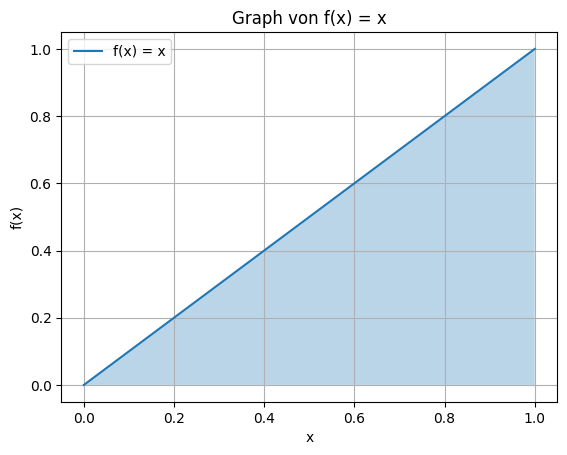

In [4]:
def f(x):
    return x

x = np.linspace(0, 1, 100)
y = f(x)

plt.plot(x, y, label='f(x) = x')
plt.fill_between(x, y, alpha=0.3)
plt.title("Graph von f(x) = x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# 🧪 Teil 4: Test der numerischen Methoden

## 🎯 Ziel
Vergleich verschiedener Methoden an Funktionen mit bekannter Stammfunktion.

## 📐 Beispiel-Funktionen

| Funktion                         | Intervall     | Stammfunktion \(F(x)\)                        |
|----------------------------------|---------------|-----------------------------------------------|
| \( f(x) = \sin(x) \)             | \([0, 2\pi]\) | \( F(x) = -\cos(x) \)                          |
| \( f(x) = x^2 - 4x + 2 \)        | \([-3, 3]\)   | \( F(x) = \frac{x^3}{3} - 2x^2 + 2x \)         |
| \( f(x) = e^x \)                 | \([0, 10]\)   | \( F(x) = e^x \)                               |

## 📉 Fehleranalyse
Berechne:

\[
\text{Fehler} = \left| \text{numerischer Wert} - \text{exakter Wert} \right|
\]

Zeige, wie der Fehler abnimmt, wenn die Anzahl der Intervalle \( n \) oder Stichproben \( N \) erhöht wird.


In [5]:
# f(x) = x^2, Stammfunktion: F(x) = x^3 / 3
def f(x):
    return x**2
def F(x):
    return x**3 / 3

a, b = 0, 1
true_value = F(b) - F(a)

# Trapezregel mit n = 10
n = 10
x = np.linspace(a, b, n+1)
dx = (b - a) / n
y = f(x)
approx = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))

print("Exakter Wert:", true_value)
print("Numerische Näherung:", approx)


Exakter Wert: 0.3333333333333333
Numerische Näherung: 0.3350000000000001


# 🚧 Teil 5: Grenzen numerischer Integration

## 🎯 Ziel
Demonstration der Grenzen bei stark oszillierenden Funktionen.

## 📐 Beispiel-Funktion

\[
f(x) = \sin\left((x + \frac{1}{32}) \cdot 16\pi\right)
\quad \text{auf } [0, 1]
\]

- Diese Funktion oszilliert 8-mal auf \([0, 1]\)
- Niedrige \( n \) führen zu ungenauen Ergebnissen

## 📊 Vorgehen
Vergleiche die Trapezregel bei:
- \( n = 2, 4, 8, 16 \)
- Werte weichen stark ab bei niedriger Auflösung

## ✅ Erkenntnisse
- Hohe Frequenz benötigt feine Unterteilung
- Monte-Carlo kann robust sein, aber langsam konvergieren
- Adaptive Verfahren wären besser geeignet


In [5]:
def f(x):
    return np.sin((x + 1/32) * 16 * np.pi)

a, b = 0, 1

for n in [2, 4, 8, 16]:
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n
    y = f(x)
    trapez = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    print(f"n = {n:2d} → Trapezregel: {trapez:.6f}")


n =  2 → Trapezregel: 1.000000
n =  4 → Trapezregel: 1.000000
n =  8 → Trapezregel: 1.000000
n = 16 → Trapezregel: 0.000000


# Zusammenfassung



# Ein möglicher vollständiger Code

## Aufbau des Codes:



--- Teil 1: Untersumme & Obersumme ---
Untersumme: 1.104599
Obersumme:  1.492177

--- Teil 2: Trapezregel ---
Trapezregel: 1.298388

--- Teil 3: Monte-Carlo-Integration ---
Monte-Carlo (N=10000): 1.298233

--- Teil 4: Plot der Funktion f(x) ---


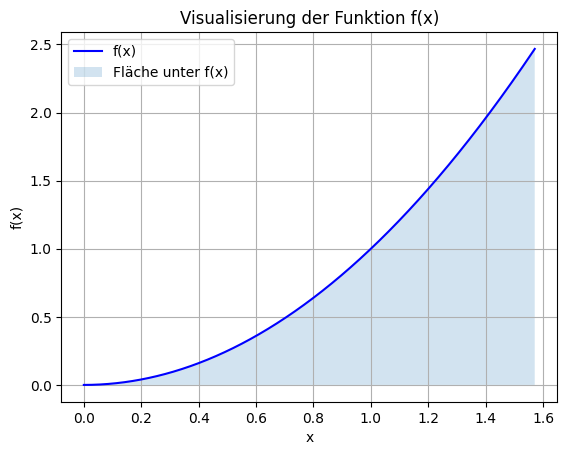


--- Teil 5: Exakter Wert (falls bekannt) ---


NameError: name 'sin' is not defined

In [6]:
def main():
    durchlaeufe = []  # Liste aller Durchläufe (je dict mit inputs+outputs+status)

    while True:
        # Speichere alle Eingaben
        inputs = {}

        inputs['f_string'] = input("Gib die Funktion f(x) ein (z. B. 'x**2', 'np.sin(x)'): ")
        a_str = input("Untere Grenze a (z.B. '0', 'pi/2', '2*pi'): ")
        b_str = input("Obere Grenze b (z.B. 'pi', '3*pi/2'): ")
        inputs['a'] = eval(a_str, {"pi": math.pi, "np": np, "math": math})
        inputs['b'] = eval(b_str, {"pi": math.pi, "np": np, "math": math})
        inputs['n'] = int(input("Anzahl der Intervalle n: "))
        inputs['N_mc'] = int(input("Monte-Carlo-Stichproben N: "))
        inputs['F_string'] = input("Stammfunktion F(x) (für exakten Wert, leer lassen wenn unbekannt): ").strip()

        def f(x):
            return eval(inputs['f_string'], {"np": np, "math": math, "x": x})

        def F(x):
            if not inputs['F_string']:
                return None
            return eval(inputs['F_string'], {"np": np, "math": math, "x": x})

        dx = (inputs['b'] - inputs['a']) / inputs['n']
        x = np.linspace(inputs['a'], inputs['b'], inputs['n'] + 1)
        y = f(x)

        def weiter_machen(teil):
            antwort = input(f"Möchtest du mit Teil {teil} weitermachen? (j/n): ").lower()
            return antwort == 'j'

        outputs = {}  # Speichere alle Outputs des aktuellen Durchlaufs

        # Teil 1
        print("\n--- Teil 1: Untersumme & Obersumme ---")
        lower_sum = sum(min(f(x[i]), f(x[i + 1])) for i in range(inputs['n'])) * dx
        upper_sum = sum(max(f(x[i]), f(x[i + 1])) for i in range(inputs['n'])) * dx
        print(f"Untersumme: {lower_sum:.6f}")
        print(f"Obersumme:  {upper_sum:.6f}")
        outputs['Teil 1'] = {'Untersumme': lower_sum, 'Obersumme': upper_sum}

        if not weiter_machen(2):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 1'
            })
            continue

        # Teil 2
        print("\n--- Teil 2: Trapezregel ---")
        trapezoid = dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))
        print(f"Trapezregel: {trapezoid:.6f}")
        outputs['Teil 2'] = {'Trapezregel': trapezoid}

        if not weiter_machen(3):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 2'
            })
            continue

        # Teil 3
        print("\n--- Teil 3: Plot der Funktion f(x) ---")
        x_plot = np.linspace(inputs['a'], inputs['b'], 1000)
        y_plot = f(x_plot)
        plt.plot(x_plot, y_plot, label='f(x)', color='blue')
        plt.fill_between(x_plot, y_plot, alpha=0.2, label='Fläche unter f(x)')
        plt.title("Visualisierung der Funktion f(x)")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
        outputs['Teil 4'] = {'Plot': 'erstellt'}

        if not weiter_machen(4):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 3'
            })
            continue

        # Teil 4
        print("\n--- Teil 4: Monte-Carlo-Integration ---")
        samples = np.random.uniform(inputs['a'], inputs['b'], inputs['N_mc'])
        mc_result = (inputs['b'] - inputs['a']) * np.mean(f(samples))
        print(f"Monte-Carlo (N={inputs['N_mc']}): {mc_result:.6f}")
        outputs['Teil 3'] = {'Monte-Carlo': mc_result}


        if not weiter_machen(5):
            print("Starte neu mit Eingaben.")
            durchlaeufe.append({
                'inputs': inputs,
                'outputs': outputs,
                'status': 'abgebrochen nach Teil 4'
            })
            continue

        # Teil 5
        print("\n--- Teil 5: Exakter Wert (falls bekannt) ---")
        if inputs['F_string']:
            true_value = F(inputs['b']) - F(inputs['a'])
            print(f"Exakter Wert: {true_value:.6f}")
            outputs['Teil 5'] = {'Exakter Wert': true_value}
        else:
            print("Kein exakter Wert angegeben.")
            outputs['Teil 5'] = {'Exakter Wert': None}

        durchlaeufe.append({
            'inputs': inputs,
            'outputs': outputs,
            'status': 'vollständig'
        })

        print("Programm beendet.")
        break

    # Am Ende alle Durchläufe ausgeben:
    print("\n=== Übersicht aller Durchläufe ===")
    for i, d in enumerate(durchlaeufe, 1):
        print(f"\nDurchlauf {i}: Status: {d['status']}")
        print("Eingaben:")
        for k,v in d['inputs'].items():
            print(f"  {k}: {v}")
        print("Ausgaben:")
        for teil, res in d['outputs'].items():
            print(f"  {teil}:")
            for k2,v2 in res.items():
                print(f"    {k2}: {v2}")

main()


In [ ]:
from reportlab.pdfgen import canvas

c = canvas.Canvas("example.pdf")
c.drawString(100, 750, "Hallo Welt, PDF ohne wkhtmltopdf!")
c.save()


In [8]:
import os

# Manuell sicherstellen, dass Pandoc im Pfad ist
os.environ["PATH"] += os.pathsep + r"C:\Users\Krzysztof.Owczarek\AppData\Local\Pandoc"



In [6]:
!pandoc --version


Der Befehl "pandoc" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
